Лосева Надежда, группа 3

<h1>Video Game Sales</h1>

https://www.kaggle.com/datasets/gregorut/videogamesales

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include:
* Rank - Ranking of overall sales
* Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.)
* Year - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
It is based on BeautifulSoup using Python.
There are 16,598 records. 2 records were dropped due to incomplete information.

<h4> Цель: найти наиболее перспективный жанр игры для потенциальной
разработки.</h4>
<h4>Гипотеза: есть жанр игр (возможно в связке с платформой или что-то еще),
который продается лучше.
</h4>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_analytics/data/vgsales.csv')
df.shape

(16598, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
# Проверим кол-во пустых значений

df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
# Проверим наличие дубликатов, уберем колонку Rank как автоматически присвоенную
# (скорее всего так, тем более в ней есть сбой в нумерации)

df.drop(columns=['Rank'], inplace=True)

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Вообще возможна ситуация, когда дублирование будет по именам, если другие поля остались, к примеру, пустыми
# Проверим дубликаты по комбинации имя + платформа

df[df[['Name', 'Platform']].duplicated()].sort_values(by=['Name', 'Platform'])

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16127,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.0,0.01,0.00,0.00,0.01
11676,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0.0,0.06,0.00,0.02,0.08
1530,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.0,0.17,0.02,0.10,1.29
4145,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.0,0.48,0.00,0.00,0.48


In [ ]:
# Посмотрим, чем предполагаемые дубликаты отличаются от оригиналов:

duble_names = df[df[['Name', 'Platform']].duplicated()].Name
duble_platf = df[df[['Name', 'Platform']].duplicated()].Platform
for name, platf in zip(duble_names, duble_platf):
    display(df[(df.Name == name) & (df.Platform == platf)])

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1173,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
1530,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1715,Sonic the Hedgehog,PS3,2006.0,Platform,Sega,0.41,0.07,0.04,0.66,1.18
4145,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5900,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.0,0.05,0.30
11676,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0.00,0.06,0.0,0.02,0.08


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
603,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0.0,0.22,2.56
16127,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.0,0.00,0.01


In [ ]:
# Видно, что мы не доучли параметр год. Он у нас частично пустой, но там, где есть - 
# свидетельствует о выходе нового издания игры, который вполне разумно считать отдельно

# Для остальных игр видно задвоение данных, при этом при одинаковом (или пустом) годе выхода
# при различии полей продаж, вероятно, произошло случайное разделение 
# и имеет смысл продажи сложить, а не удалить

for name, platf in zip(duble_names, duble_platf):
    temp_index = df[(df.Name == name) & (df.Platform == platf)].index
    
    # Заполним пустой год
    df_year = df[(df.Name == name) & (df.Platform == platf)].Year
    if df_year.isna().sum() > 0:
        df_year = df_year.fillna(method='bfill')
        df_year = df_year.fillna(method='ffill')
        for i in temp_index:
            df.loc[i, ['Year']] = df.loc[i, ['Year']].fillna(df_year[i])
    
    # Сложим продажи игр с одинаковым названием, платформой, годом
    if len(set(df_year)) == 1:
        for c in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']:
            df.loc[temp_index[0], [c]] = df.loc[temp_index[0], [c]] + df.loc[temp_index[1], [c]]
        # Удалим дубликаты
        df.drop(index=[temp_index[1]], inplace=True)

In [ ]:
# Посмотрим, что мы можем сделать с пропусками
# С издателем вряд ли мы можем придумать что-то разумное, поэтому заполним значением 'Unknown' 
# (оно и так уже присутствует в датасете)

df.Publisher = df.Publisher.fillna('Unknown')

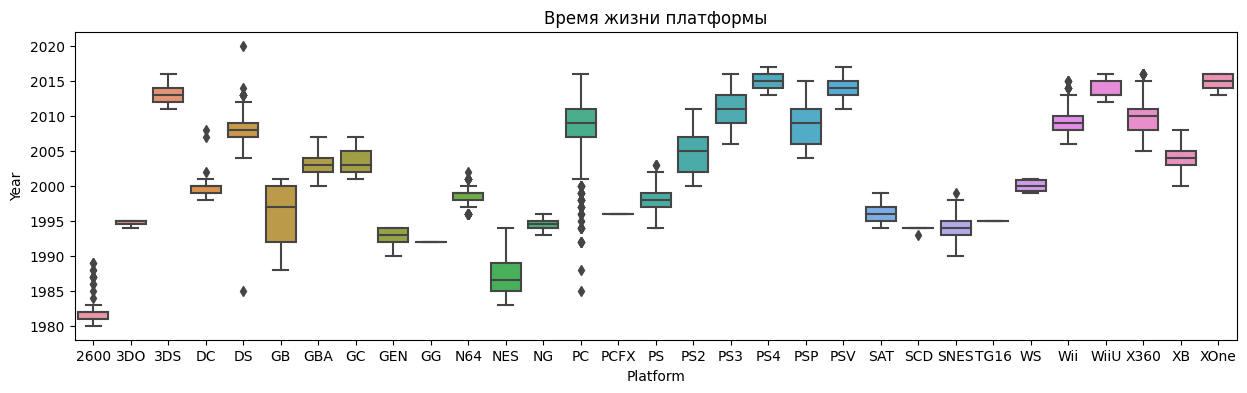

In [ ]:
# Поcмотрим на распределение игровых платформ по годам
# Видны странные выбросы для платформ Dreamcast (DC), DS. Маловероятно, что возможен такой разброс по годам выхода игр, вероятно, там ошибки.
# Аналогисные выбросы для PC не являются аномалией, а следствие естественного развития рынка компьютерных игр.

plt.figure(figsize=(15,4))
sns.boxplot(data=df, x=df.Platform.sort_values(), y='Year')
plt.title("Время жизни платформы");

In [ ]:
# Посмотрим повнимательнее на обнаруженные выборсы

df[df.Platform == 'DC'].describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,52.000000,52.000000,52.00000,52.000000,52.000000,52.000000
mean,1999.942308,0.104423,0.03250,0.164615,0.005192,0.307115
std,1.808623,0.311979,0.11655,0.132539,0.016976,0.469912
min,1998.000000,0.000000,0.00000,0.000000,0.000000,0.020000
25%,1999.000000,0.000000,0.00000,0.067500,0.000000,0.077500
50%,2000.000000,0.000000,0.00000,0.120000,0.000000,0.135000
75%,2000.000000,0.000000,0.00000,0.222500,0.000000,0.297500
max,2008.000000,1.260000,0.61000,0.520000,0.080000,2.420000


In [ ]:
# Значения года больше 2002 года являются ошибками в данных, поскольку платформа официально прекратила выпуск в 2001
# Можно нагуглить правильный год, но в целях экономиии сил мы просто заменим на среднестатистическое по группе

df[df.Platform == 'DC'].sort_values(by='Year', ascending=False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
13958,Pia Carrot e Youkoso!! 2.5,DC,2008.0,Adventure,NEC Interchannel,0.0,0.0,0.04,0.0,0.04
15899,Triggerheart Exelica,DC,2007.0,Shooter,Warashi,0.0,0.0,0.02,0.0,0.02
6058,"Sakura Wars 4: Koi Seyo,Otome",DC,2002.0,Adventure,Sega,0.0,0.0,0.29,0.0,0.29
8916,Shenmue II,DC,2001.0,Adventure,Sega,0.0,0.0,0.15,0.0,0.15
13873,Gundam Battle Online,DC,2001.0,Action,Namco Bandai Games,0.0,0.0,0.04,0.0,0.04


In [ ]:
dc_wrong_year = df[(df.Platform == 'DC') & (df.Year >2002)].index
for i in dc_wrong_year:
  df.loc[i, ['Year']] = df[df.Platform == 'DC'].Year.median()

In [ ]:
# Проделаем аналогичное упражнение для DS

df[df.Platform == 'DS'].describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,2133.000000,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000
mean,2008.201125,0.180633,0.089991,0.081170,0.027984,0.380254
std,1.805339,0.537962,0.497925,0.391225,0.128631,1.434616
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2007.000000,0.000000,0.000000,0.000000,0.000000,0.050000
50%,2008.000000,0.060000,0.000000,0.000000,0.010000,0.110000
75%,2009.000000,0.170000,0.020000,0.030000,0.020000,0.280000
max,2020.000000,11.380000,11.000000,6.500000,2.900000,30.010000


In [ ]:
# Очевидно минимальный и максимальный год являются ошибочными, заменим их также на среднее по группе

df[df.Platform == 'DS'].sort_values(by='Year')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15867,Strongest Tokyo University Shogi DS,DS,1985.0,Action,Mycom,0.00,0.00,0.02,0.00,0.02
2681,Pokemon Dash,DS,2004.0,Racing,Nintendo,0.21,0.14,0.38,0.04,0.77
6551,Polarium,DS,2004.0,Puzzle,Nintendo,0.13,0.01,0.11,0.01,0.26
6507,Madden NFL 2005,DS,2004.0,Sports,Electronic Arts,0.24,0.00,0.00,0.02,0.26
3378,Asphalt: Urban GT,DS,2004.0,Racing,Ubisoft,0.31,0.22,0.00,0.06,0.60
...,...,...,...,...,...,...,...,...,...,...
15697,Shonen Jump's Yu-Gi-Oh! GX Card Almanac,DS,NaN,Misc,Konami Digital Entertainment,0.00,0.00,0.02,0.00,0.02
15865,PDC World Championship Darts 2008,DS,NaN,Sports,Unknown,0.01,0.00,0.00,0.00,0.02
15900,Jet Impulse,DS,NaN,Simulation,Nintendo,0.00,0.00,0.02,0.00,0.02
15915,Dream Dancer,DS,NaN,Misc,Unknown,0.01,0.00,0.00,0.00,0.02


In [ ]:
ds_wrong_year = df[(df.Platform == 'DS') & ((df.Year < 2004) | (df.Year > 2014))].index
for i in ds_wrong_year:
  df.loc[i, ['Year']] = df[df.Platform == 'DS'].Year.median()

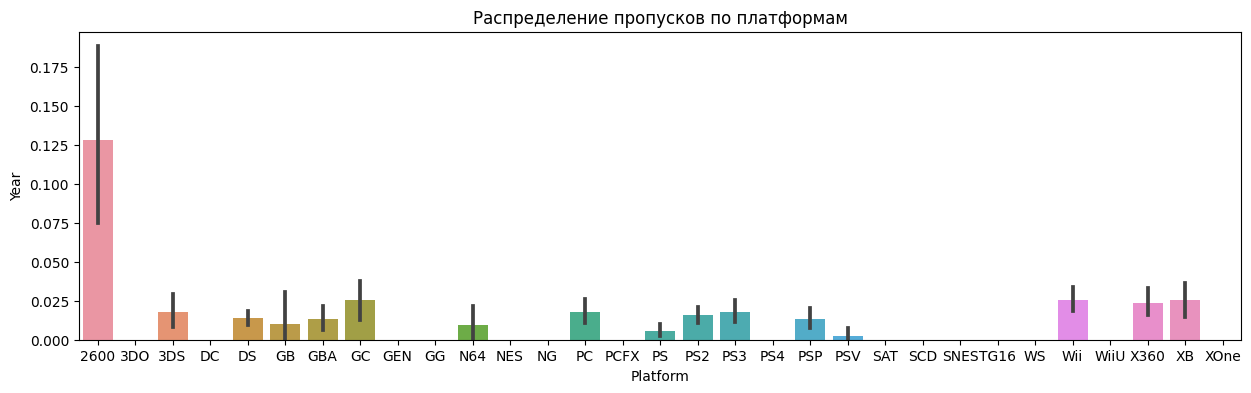

In [ ]:
# Поскольку у каждой платформы есть свой срок жизни, вероятно, имеет смысл
# присвоить для пропусков средний год эксплуатации платформы
# На всякий случай посмотрим распределение пропусков по платформам

plt.figure(figsize=(15,4))
sns.barplot(x = df.Platform.sort_values(), y = df.Year.isna(), estimator='mean')
plt.title("Распределение пропусков по платформам");

In [ ]:
# Больше всего пропусков у самой старой платформы, у остальных кол-во пропусков незначительно,
# значит, мы не получим значительного искажения. Заполним пропуски средними значениями

df['Year'] = df.groupby('Platform')['Year'].transform(lambda grp: grp.fillna(grp.median()))

In [ ]:
# Проверим, что пропусков больше нет
df.isna().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
# Пересортируем данные с учетом изменений общих сумм продаж

df.sort_values(by=['Global_Sales', 'NA_Sales', 'Name'], ascending=[False, False, True], inplace=True)
df.reset_index(inplace=True, drop=True)

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16590,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008.0,Racing,Takara Tomy,0.00,0.00,0.01,0.00,0.01
16591,Young Justice: Legacy,X360,2013.0,Action,Namco Bandai Games,0.00,0.01,0.00,0.00,0.01
16592,Zero no Tsukaima: Maigo no Period to Ikusen no...,PS2,2008.0,Adventure,Marvelous Interactive,0.00,0.00,0.01,0.00,0.01
16593,ef - a fairy tale of the two.,PS2,2010.0,Adventure,Comfort,0.00,0.00,0.01,0.00,0.01


2. Рассчитайте основные статистические показатели для числовых переменных,
такие как среднее, медиана и стандартное отклонение. Другие статистические
показатели также могут быть рассчитаны в зависимости от конкретных целей
и задач анализа данных. Сделайте вывод по результатам.


In [ ]:
# В датасете представлены игры, имеющие мировые продажи от 10 до 82_740 тыс.
# При этом абсолютное большинство (больше 75%) не превышает порога в полмиллиона
# Крупнейший рынок - США, за ним следует ЕС, затем Япония, а потом все остальные страны, вместе взятые
# В среднем игра-хит продает 265тыс. в США, 147тыс. в Европе, 78тыс. в Японии и 48тыс. в остальном мире

df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16595.000000,16595.000000,16595.000000,16595.000000,16595.000000,16595.000000
mean,2006.394878,0.264715,0.146679,0.077795,0.048072,0.537537
std,5.847173,0.816749,0.505397,0.309317,0.188604,1.555175
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2017.000000,41.490000,29.020000,10.220000,10.570000,82.740000


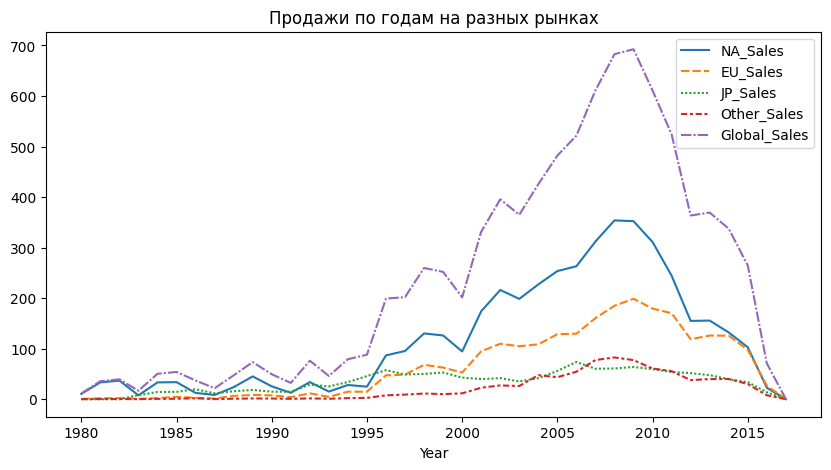

In [ ]:
# До 1997 года лидировали то США, то Япония, но в дальнейшем японский рынок стагнирует, 
# а на 2е место выходит ЕС
# Остальной мир начал постепенно расти с 2000х и даже в какой-то момент обогнал Японию,
# но потом случилось общее затухание рынка видеоигр.

plt.figure(figsize=(10,5))
sns.lineplot(df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum())
plt.title("Продажи по годам на разных рынках");

In [ ]:
# Самые ранние из игр появились в 1980году. Расцвет (наибольшее кол-во) пришелся на промежуток с 2007 по 2010год.
# Также мы видим странное исчезновение данных с 2016года. Имеющееся значение за 2017год кажется случайным выбросом
# Здесь следует уточнить, корректны ли данные за 2016 и 2017 год, возможно есть определеное опоздание по внесению данных продаж.
# Не зная, на какую конкретно дату собраны данные, сложно судить о продажах игр, вышедших в последние несколько лет
# Также есть вероятность (если данные корректны, а дата подсчета отстоит от 2016 года на несколько лет), что видеоигры в общей массе настолько резко потеряли популярность,
# что не смогли перейти порог в продажах 100_000 копий (ограничение по скрейпингу данных) или
# издатели по какой-то причине почти перестали в таком количсевте выпускать новинки, например, переключившись
# на разработку мобильных игр
# Если рассмотреть долю отдельных платформ:
# Очевидно, что расцвет пришелся на время популярности Wii и Nintendo (DS), которые изрядно потеснили PS и XB,
# но почти полностью потеряли популярность к 2012 году.
# Последние лидеры рынка: PlayStation4, Xbox One, PlayStation Vita

year_hist = px.histogram(df, x="Year", color='Platform', 
                         title='Распределение видеоигр, перешагнувших порог в 100_000 копий, по годам и платформам')
year_hist.show()

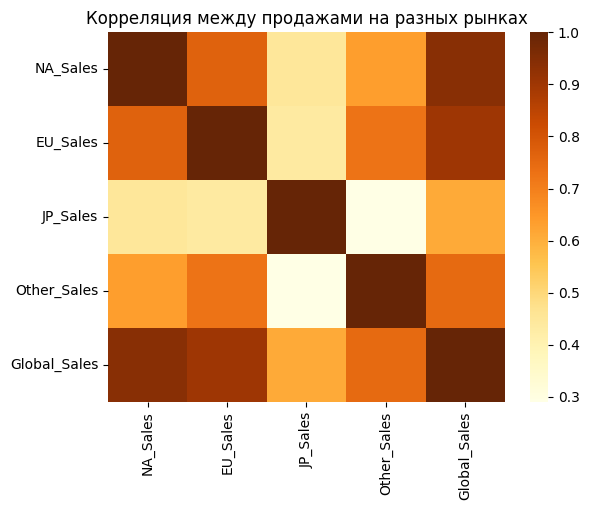

In [ ]:
# Построим матрицу корреляции между разными рынками. Мы видим, что мировые продажи максимально зависят от американского и похожего на него европейского рынков
# А новые рынки (others) ведут себя отлично от всего, что можно объяснить тем, что туда свалили самые разные страны, демонстрирующие разнонаправленные тренды.

sns.heatmap(df[['NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr(), cmap='YlOrBr')
plt.title('Корреляция между продажами на разных рынках');

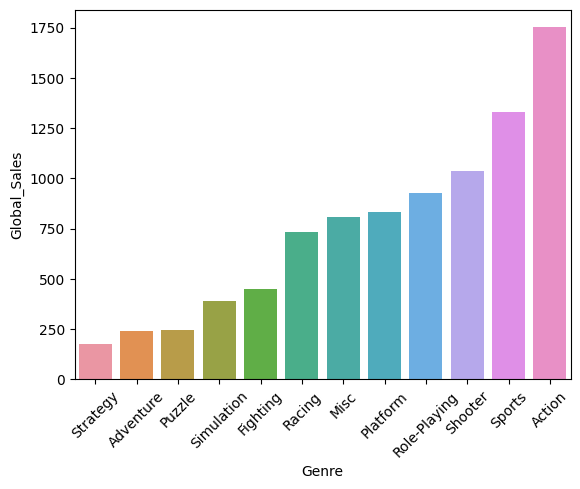

In [ ]:
# Посмотрим, какие жанры принесли больше всего денег издателям 
# Прежде всего это экшны и спортивные игры, далее следуют шутеры, рпг, платформеры и гонки. Остальные жанры сильно отстают

genre_sales = df.groupby('Genre').agg({'Global_Sales': 'sum'}).sort_values(by='Global_Sales')
genre_sales = genre_sales.reset_index()
sns.barplot(genre_sales, x='Genre', y='Global_Sales')
plt.xticks(rotation=45);

In [ ]:
# Посмотрим жанровое распределение по годам:
# видно, что боевики и рпг пострадали от падения популярности после 2011 года в наименьшей степени
# Основные потери пришлись на спортивные и "разные" игры (в их числе, например, активные игры кинект и танцы, которые тоже можно условно причислить к спортивным)

genre_hist = px.histogram(df, x="Year", color='Genre', title='Распределение игровых жанров по годам')
genre_hist.show()

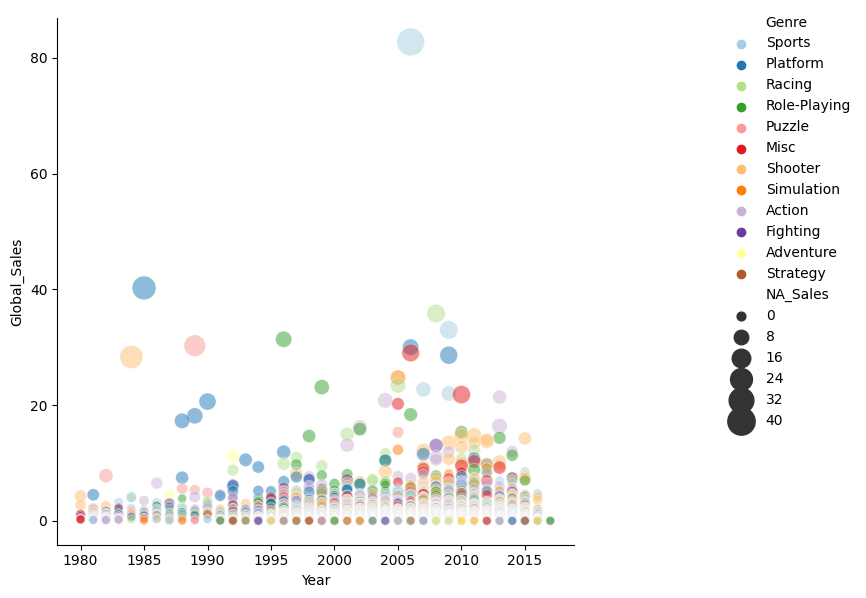

In [ ]:
# А теперь посмотрим на отдельные хиты
# (размер точки зависит от продаж на "главном" рынке - NA)
# Главный хит всех времен - спортивная игра
# В 80е хиты: платформеры, шутера, паззлы
# В 90е на сцену выходят рпг и гонки
# В 00 - спорт, музыка и гонки

sales_rel = sns.relplot(data=df, x='Year', y='Global_Sales', hue="Genre", size="NA_Sales",
            sizes=(40, 400), alpha=.5, palette="Paired",
            height=6)
sns.move_legend(sales_rel, loc='upper right', bbox_to_anchor=(1.2, 1));

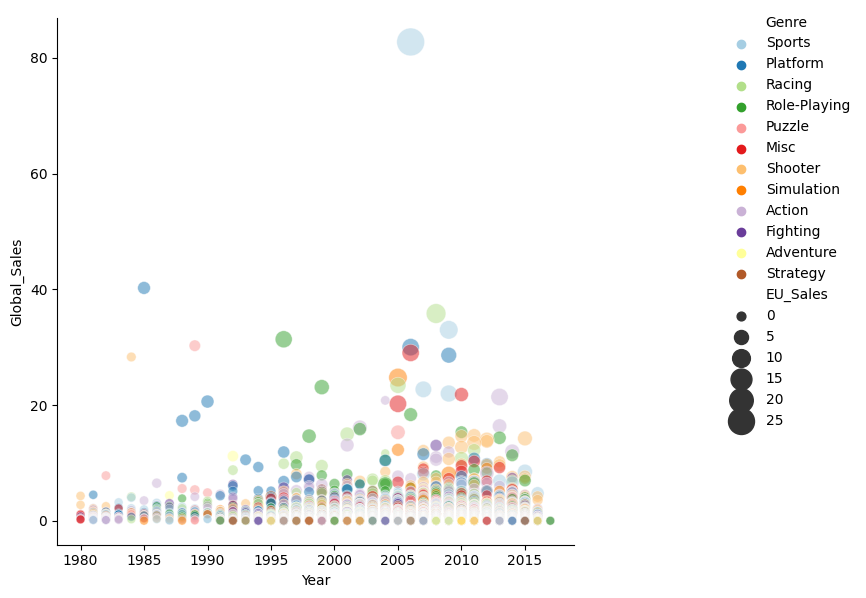

In [ ]:
# Сравним с Европейским рынком:
# Видно, что видеоигры здесь стали популярны позже, чем в США,
# но в общем популярны те же жанры и рынки выглядят похоже

sales_rel = sns.relplot(data=df, x='Year', y='Global_Sales', hue="Genre", size="EU_Sales",
            sizes=(40, 400), alpha=.5, palette="Paired",
            height=6)
sns.move_legend(sales_rel, loc='upper right', bbox_to_anchor=(1.2, 1));

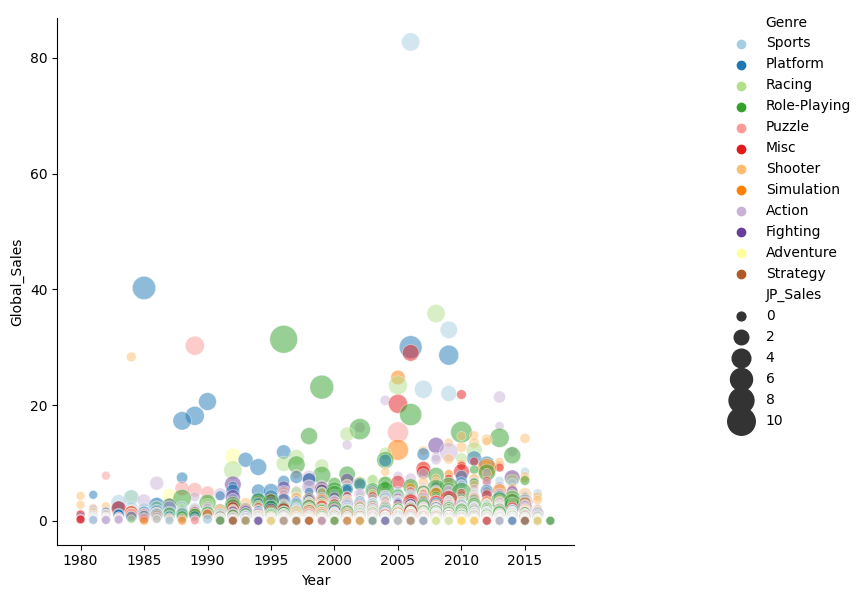

In [ ]:
# А вот на Японском рынке явно видно отличие в жанровых предпочтениях:
# шутеры здесь непопулярны, зато рпг в лидерах

sales_rel = sns.relplot(data=df, x='Year', y='Global_Sales', hue="Genre", size="JP_Sales",
            sizes=(40, 400), alpha=.5, palette="Paired",
            height=6)
sns.move_legend(sales_rel, loc='upper right', bbox_to_anchor=(1.2, 1));

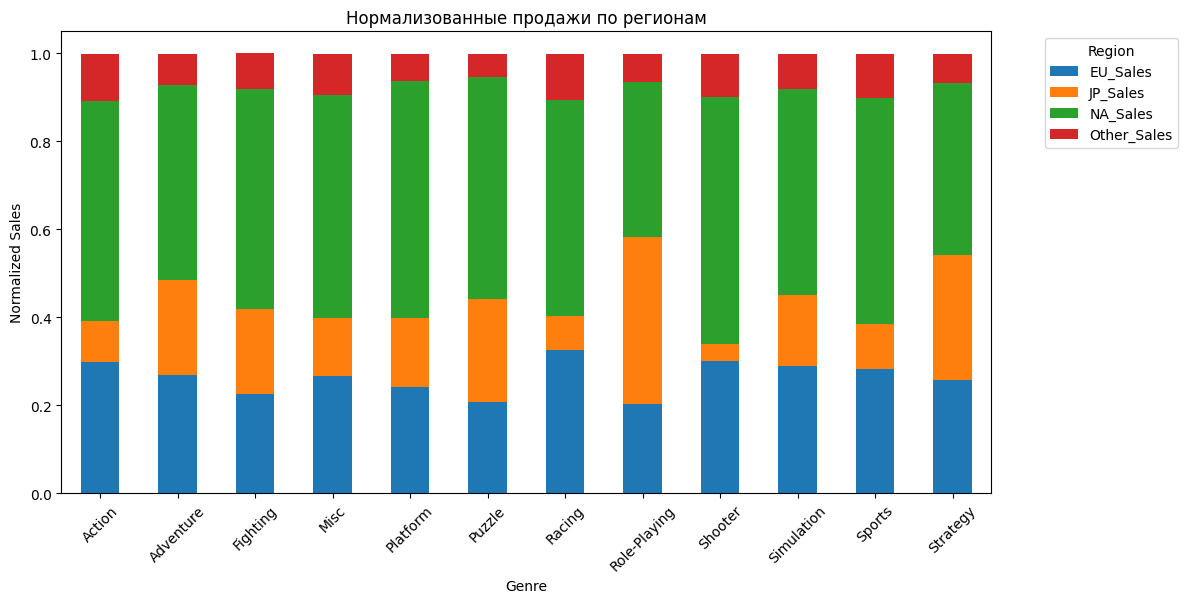

In [ ]:
# Посмотрим на популярность отдельных жаноров на разных рынках на более наглядном графике
# Здесь хорошо видна особенность японского рынка: любовь к РПГ и стратегиям и нелюбовь к шутерам и гонкам (в противовес к США)

genre_sales = df.groupby('Genre').agg({'NA_Sales': 'sum',
       'EU_Sales': 'sum', 'JP_Sales': 'sum', 'Other_Sales': 'sum', 'Global_Sales': 'sum'})
genre_sales = genre_sales.reset_index()
genre_sales_melted = pd.melt(genre_sales, id_vars=['Genre', 'Global_Sales'], 
                             value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], 
                             var_name='Region', value_name='Sales')
genre_sales_melted['Sales'] = genre_sales_melted['Sales'] / genre_sales_melted['Global_Sales']
genre_sales_pivot = genre_sales_melted.pivot(index='Genre', columns='Region', values='Sales')
ax = genre_sales_pivot.plot(kind='bar', stacked=True, figsize=(12,6))
ax.set_xlabel('Genre')
ax.set_ylabel('Normalized Sales')
ax.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Нормализованные продажи по регионам')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# С учетом того, что платформы устаревают и после устаревания больше не используются, имеет смысл проанализировать только те платформы, 
# которые еще функционировали после 2011 года (когда произошел резкий слом тренда)

df[df.Year > 2011].Platform.value_counts()

PS3     488
PSV     395
3DS     393
PS4     336
X360    294
PC      231
XOne    213
PSP     173
WiiU    143
Wii      54
DS       35
Name: Platform, dtype: int64

In [ ]:
# Если посмотреть динамику распределения топовых игр по платформам, то хорошо видно "умирание" устаревающих платформ:
# PS3, X360, Wii, PSP, DS
# В то же время есть платформы со стабильной аудиторией: Nintendo 3DS, Nintendo WiiU, PC
# И с растущей до 2016 года аудиторией: PlayStation4, Xbox One, PlayStation Vita

# Отсюда можно заключить, что новый хит может выйти или на одной из трех "растущих платформ", или на новой платформе
# (например, если Нинтендо сможет удачно перезапуститься, или для PC выйдет доп устройство для принципиально иного уровня вовлеченности в игру)

genre_hist = px.histogram(df[df.Year > 2011], x="Year", color='Platform', title='Динамика распределения платформ')
genre_hist.show()

In [ ]:
# Как мы установили выше, на жанры есть мода. Она, вероятно, связана как со сменой устройтсв и их возможностей, так и с
# со сменой поколений игроков и их предпочтений. Тем не менее есть истории супер-хитов и мы можем посмотреть абсолютных лидеров
# за всю историю

# Как видим, компания Нинтендо выпустила множество хитов, большинство из них спортивные и платформеры, завязанные на устройство Нинтендо
# но все они вышли довольно давно

df.sort_values(by='Global_Sales', ascending=False).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
# Посмотрим на топ хиты без нинтендо

# Мы видим, что на первом месте подвижные игры для кинекта. Т.е. люди хотят двигаться, а не сидеть, играя.
# Вероятно, именно понимание этого привело к успеху Нинтендо, но сейчас их платформа морально устарела, а нового достойного преемника пока не видно.

# Далее следуют супер-успешные GTA: мультиплатформенный приключенческий экшн и Call of Duty: также мультиплатформенный шутер от первого лица

df[df.Publisher != 'Nintendo'].sort_values(by = 'Global_Sales', ascending=False).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
28,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
30,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03


In [ ]:
# В то же время топовые гонки со временем потеряли популярность. Может, виновато ограничение по платформам,
# но скорее автогонки просто теряют популярность. Версия Gran Turismo для PS4 даже не вошла в топ игр, а может просто запаздала с выходом 
# (релиз - 2017 год, после угасания видеоигр). Впрочем, возможно, что данные обрезаны началом 2017 года, поэтому судить рано

df[df['Name'].str.contains('Gran Turismo')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
28,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
47,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
52,Gran Turismo,PS,1997.0,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95
54,Gran Turismo 5,PS3,2010.0,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
69,Gran Turismo 2,PS,1999.0,Racing,Sony Computer Entertainment,3.88,3.42,1.69,0.50,9.49
271,Gran Turismo 5 Prologue,PS3,2007.0,Racing,Sony Computer Entertainment,1.28,1.83,0.57,0.53,4.20
345,Gran Turismo 6,PS3,2013.0,Racing,Sony Computer Entertainment,0.71,1.80,0.40,0.74,3.64
413,Gran Turismo (PSP),PSP,2009.0,Racing,Sony Computer Entertainment,0.50,1.59,0.31,0.87,3.27
942,Gran Turismo Concept 2001 Tokyo,PS2,2001.0,Racing,Unknown,0.00,1.10,0.42,0.33,1.84
1379,Gran Turismo 4 Prologue,PS2,2003.0,Racing,Sony Computer Entertainment,0.00,0.47,0.77,0.17,1.41


In [ ]:
# Ну и посмотрим еще 2 выборки:
# Главные хиты после 2011 года и на новых рынках
# Самым интересным тут является полное исчезновение активных игр "для друзей" типа Wii,
# а также появление нового типа игр - Minecraft: свободная вселенная, где сочетаестся свобода творчества, ммо, экшн, шутер и приключения
# Дополнительно можно отметить рост популярности футбольных симуляторов

df[df.Year > 2011].sort_values(by = 'Global_Sales', ascending=False).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
32,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
33,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
44,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
49,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
61,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,6.72,2.63,0.04,0.82,10.21
64,New Super Mario Bros. 2,3DS,2012.0,Platform,Nintendo,3.66,3.07,2.47,0.63,9.82


In [ ]:
# Теперь прицельно посмотрим на "новые рынки"
# Видно, что любовь к футбольным симуляторам здесь выражена ярче, чем в общем по миру
# Также заметно большее разнообразие шутеров. Вероятно, это связано с отсутвием большого числа старых ностальгирующих по известным сериям игроков

df[df.Year > 2011].sort_values(by = 'Other_Sales', ascending=False).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
33,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
44,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
82,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
113,FIFA 14,PS3,2013.0,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90
125,FIFA 15,PS4,2014.0,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.59
67,Call of Duty: Ghosts,PS3,2013.0,Shooter,Activision,4.09,3.73,0.38,1.38,9.59
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
94,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,2.80,3.30,0.14,1.37,7.60


In [ ]:
# Проверим, можем ли мы найти еще какие-то скрытые взаимосвязи между жанром, издателем, платформой и продажами

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Genre_encoded'] = le.fit_transform(df['Genre'])

In [ ]:
top_25_publishers = df['Publisher'].value_counts().head(25).index
value_dict = {publisher: i+1 for i, publisher in enumerate(top_25_publishers)}
df['Publisher_encoded'] = 0
for i, value in df['Publisher'].items():
    if value in top_25_values:
        df.at[i, 'Publisher_encoded'] = value_dict[value]

In [ ]:
df['Platform_encoded'] = df['Platform'].apply(lambda x: 1 if x == '2600' else
                                      2 if x in ['NES', 'SNES', 'N64', 'GC'] else
                                      3 if x in ['GB', 'GBA', 'DS', '3DS'] else
                                      4 if x in ['Wii', 'WiiU'] else
                                      5 if x in ['XB', 'X360', 'XOne'] else
                                      6 if x in ['PS', 'PS2', 'PS3', 'PS4'] else
                                      7 if x in ['PSP', 'PSV'] else
                                      8 if x in ['GEN', 'DC', 'SAT'] else
                                      9 if x in ['SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX'] else
                                      0 if x == 'PC' else
                                      20)

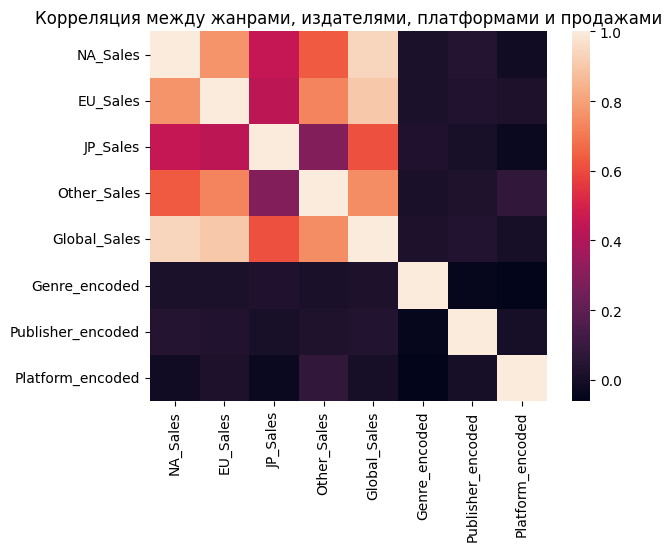

In [ ]:
# Построим матрицу корреляции
# Никаких значимых зависимостей жанров и платформ не видно

sns.heatmap(df[['NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Genre_encoded',
       'Publisher_encoded', 'Platform_encoded']].corr())
plt.title('Корреляция между жанрами, издателями, платформами и продажами');

Теперь у нас достаточно информации, чтобы сделать определенные выводы.

1.   Основной рынок, определяющий станет ли игра хитом - американский. В то же время нам необходимо учитывать спрос на новых рынках, поскольку у них большой потенциал к росту. К сожалению, в нашем датасете они все свалены в кучу "Other", хотя надо полагать, что латиноамериканский рынок скорее всего ведет себя как NA (разве что с большим сдвигом на футбол), а корейский и китайский по поведению ближе к японскому, т.е. их надо разделять как минимум по регионам и смотреть динамику соответствующим образом.
2.   Новинка не может выйти без опоры на сильную растущую платформу. Как мы видим, платформы Нинтендо выпали из борьбы. Может, мы увидим сильную новинку от них в будущем, но в данных этого нет, поэтому будем исходить из того, что новый хит должен выйти на PS4 (текущий лидер) или мультиплатформенно.
3.   По жанрам игры мировыми лидерами явлются с большим отрывом экшны и спортивные игры, далее следуют шутеры, рпг, платформеры и гонки. В то же время при падении популярности мы видели, что экшн и рпг продемонстрировали максимальную устойчивость. Это же главные фавориты двух рынков: волотильного, но денежного американского и консервативного  устойчивого японского.
4.   В то же время мы видим, что наибольший успех в истории видеоигр был связан с активными и относительно подвижными спортивными играми, рассчитанными на совместную игру в компании друзей (феноменальный успех Wii).

Исходя из всего вышеперечисленного я бы сделала ставку на экшн с дополненной реальностью, элементами рпг и возможностью игры с группой друзей. Игра должна быть произведена для платформы PS4, иметь возможность продолжения игры на мобильном устройстве или PS Vita, например, включать в себя возможность прокачки нескольких персонажей с тем, чтобы к ним могли при необходимости подключаться друзья для групповой игры. Кроме того, должна быть реализована возможность управления персонажем или прохождения части игры в дополненной или виртуальной реальности (например, с использованием местных ландшафтов, как в покемон го, или с зачетом реальной физической активности человека в счет прокачки персонажа). А также нужно предусмотреть возможность для творческой реализации игрока: например, строительство собственной или коллективной крепости с особыми характеристиками, изготовление уникального оружия или одежды, возможность создания собственных квестов/игр/лабиринтов/видеотрансляций с механизмами монетизации и т.д.